In [1]:
#Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
#Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
#Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
#Create a list for holding the cities.
cities = []
#Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    #If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
#Print the city count to confirm sufficient count.
len(cities)

587

In [6]:
#Import the requests library.
import requests

#Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [7]:
#Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
#Create an empty list to hold the weather data.
city_data = []
#Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

#Create counters.
record_count = 1
set_count = 1

#Loop through all the cities in our list.
for i, city in enumerate(cities):

    #Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    #Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    #Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    #Add 1 to the record count.
    record_count += 1
    
#Run an API request for each of the cities.
    try:
        #Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        #Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        #Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        #Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

#If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

#Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bredasdorp
Processing Record 2 of Set 1 | miraflores
Processing Record 3 of Set 1 | vostok
Processing Record 4 of Set 1 | narsaq
Processing Record 5 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 6 of Set 1 | bilibino
Processing Record 7 of Set 1 | palauig
Processing Record 8 of Set 1 | pacific grove
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | nicoya
Processing Record 11 of Set 1 | klaksvik
Processing Record 12 of Set 1 | nikolskoye
Processing Record 13 of Set 1 | vao
Processing Record 14 of Set 1 | hambantota
Processing Record 15 of Set 1 | mataura
Processing Record 16 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 17 of Set 1 | kapaa
Processing Record 18 of Set 1 | vaini
Processing Record 19 of Set 1 | vengerovo
Processing Record 20 of Set 1 | hilo
Processing Record 21 of Set 1 | nanortalik
Processing Record 22 of Set 1 | turayf


Processing Record 43 of Set 4 | panguipulli
Processing Record 44 of Set 4 | orange cove
Processing Record 45 of Set 4 | marolambo
Processing Record 46 of Set 4 | ler
Processing Record 47 of Set 4 | carnarvon
Processing Record 48 of Set 4 | rongcheng
Processing Record 49 of Set 4 | nishihara
Processing Record 50 of Set 4 | prieska
Processing Record 1 of Set 5 | lebu
Processing Record 2 of Set 5 | encruzilhada do sul
Processing Record 3 of Set 5 | guane
Processing Record 4 of Set 5 | grand river south east
City not found. Skipping...
Processing Record 5 of Set 5 | aljezur
Processing Record 6 of Set 5 | talnakh
Processing Record 7 of Set 5 | ilo
Processing Record 8 of Set 5 | tuatapere
Processing Record 9 of Set 5 | coromandel
Processing Record 10 of Set 5 | kargasok
Processing Record 11 of Set 5 | mount isa
Processing Record 12 of Set 5 | polunochnoye
Processing Record 13 of Set 5 | golfito
Processing Record 14 of Set 5 | plettenberg bay
Processing Record 15 of Set 5 | dombovar
Processin

Processing Record 26 of Set 8 | contamana
Processing Record 27 of Set 8 | anadyr
Processing Record 28 of Set 8 | galesong
Processing Record 29 of Set 8 | puerto madryn
Processing Record 30 of Set 8 | santa rosa
Processing Record 31 of Set 8 | karratha
Processing Record 32 of Set 8 | karachi
Processing Record 33 of Set 8 | grindavik
Processing Record 34 of Set 8 | saint joseph
Processing Record 35 of Set 8 | ngukurr
City not found. Skipping...
Processing Record 36 of Set 8 | maarianhamina
Processing Record 37 of Set 8 | zabid
Processing Record 38 of Set 8 | tura
Processing Record 39 of Set 8 | necochea
Processing Record 40 of Set 8 | oussouye
Processing Record 41 of Set 8 | fort saint james
Processing Record 42 of Set 8 | shubarkuduk
Processing Record 43 of Set 8 | storm lake
Processing Record 44 of Set 8 | atar
Processing Record 45 of Set 8 | churapcha
Processing Record 46 of Set 8 | wilmington island
Processing Record 47 of Set 8 | lolua
City not found. Skipping...
Processing Record 4

Processing Record 4 of Set 12 | alugan
Processing Record 5 of Set 12 | bitburg
Processing Record 6 of Set 12 | baoro
Processing Record 7 of Set 12 | cookeville
Processing Record 8 of Set 12 | dawei
Processing Record 9 of Set 12 | buckeye
Processing Record 10 of Set 12 | shelburne
Processing Record 11 of Set 12 | kalispell
Processing Record 12 of Set 12 | bida
Processing Record 13 of Set 12 | vinh
Processing Record 14 of Set 12 | sosnovka
Processing Record 15 of Set 12 | matagami
Processing Record 16 of Set 12 | marabba
Processing Record 17 of Set 12 | wangqing
Processing Record 18 of Set 12 | nuevitas
Processing Record 19 of Set 12 | uniao
Processing Record 20 of Set 12 | vila velha
Processing Record 21 of Set 12 | sao jose da coroa grande
Processing Record 22 of Set 12 | kindu
Processing Record 23 of Set 12 | sao desiderio
Processing Record 24 of Set 12 | plouzane
Processing Record 25 of Set 12 | banyumas
Processing Record 26 of Set 12 | bargal
City not found. Skipping...
Processing R

In [9]:
#Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bredasdorp,-34.5322,20.0403,46.40,93,100,3.44,ZA,2021-05-18 00:53:38
1,Miraflores,19.2167,-98.8083,66.20,55,75,11.50,MX,2021-05-18 00:53:58
2,Vostok,46.4856,135.8833,70.32,26,0,9.10,RU,2021-05-18 00:53:58
3,Narsaq,60.9167,-46.0500,39.20,65,15,16.11,GL,2021-05-18 00:53:58
4,Bilibino,68.0546,166.4372,34.05,81,26,3.04,RU,2021-05-18 00:53:59
5,Palauig,15.4350,119.9045,88.83,55,99,2.86,PH,2021-05-18 00:53:59
6,Pacific Grove,36.6177,-121.9166,57.00,88,41,12.28,US,2021-05-18 00:54:00
7,Ushuaia,-54.8000,-68.3000,50.00,57,75,14.97,AR,2021-05-18 00:48:47
8,Nicoya,10.1483,-85.4520,82.40,69,75,5.75,CR,2021-05-18 00:54:00
9,Klaksvik,62.2266,-6.5890,39.20,87,75,12.66,FO,2021-05-18 00:53:51


In [10]:
#Reorder the columns as City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed.
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bredasdorp,ZA,2021-05-18 00:53:38,-34.5322,20.0403,46.40,93,100,3.44
1,Miraflores,MX,2021-05-18 00:53:58,19.2167,-98.8083,66.20,55,75,11.50
2,Vostok,RU,2021-05-18 00:53:58,46.4856,135.8833,70.32,26,0,9.10
3,Narsaq,GL,2021-05-18 00:53:58,60.9167,-46.0500,39.20,65,15,16.11
4,Bilibino,RU,2021-05-18 00:53:59,68.0546,166.4372,34.05,81,26,3.04
5,Palauig,PH,2021-05-18 00:53:59,15.4350,119.9045,88.83,55,99,2.86
6,Pacific Grove,US,2021-05-18 00:54:00,36.6177,-121.9166,57.00,88,41,12.28
7,Ushuaia,AR,2021-05-18 00:48:47,-54.8000,-68.3000,50.00,57,75,14.97
8,Nicoya,CR,2021-05-18 00:54:00,10.1483,-85.4520,82.40,69,75,5.75
9,Klaksvik,FO,2021-05-18 00:53:51,62.2266,-6.5890,39.20,87,75,12.66


In [11]:
#Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
#Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
#Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

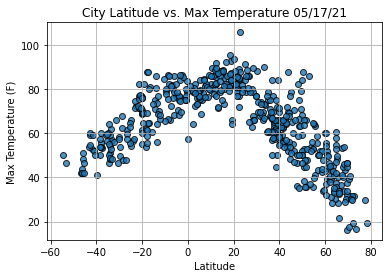

In [13]:
#Import time module
import time

#Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

#Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig1.png")

#Show plot.
plt.show()

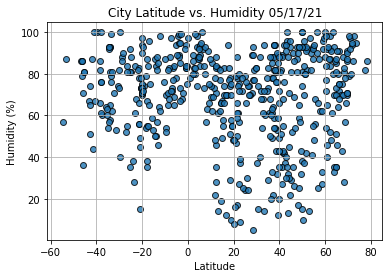

In [14]:
#Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

#Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig2.png")

#Show plot.
plt.show()

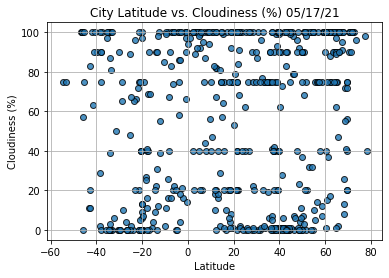

In [15]:
#Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

#Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

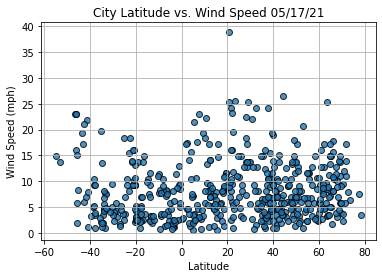

In [16]:
#Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

#Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig4.png")

#Show plot.
plt.show()

In [17]:
#Import linregress
from scipy.stats import linregress

#Create a function to create perform linear regression on the weather data and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    #Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    #Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    #Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    #Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    #Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [23]:
#Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

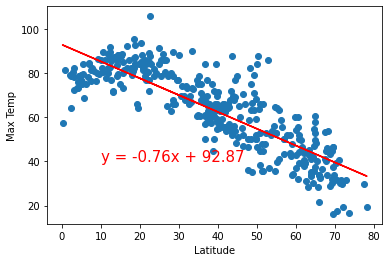

In [24]:
#Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
#Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

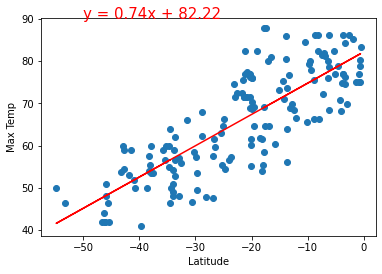

In [25]:
#Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
#Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

In [ ]:
#The correlation between the latitude and the maximum temperature is strong to very strong because the r-value is less than –0.7 for the Northern Hemisphere and greater than 0.7 for the Southern Hemisphere, as shown by the plots here. This means that as we approach the equator, 0° latitude, the temperatures become warmer. And when we are further from the equator the temperatures become cooler. Check the r-values for your plots. 

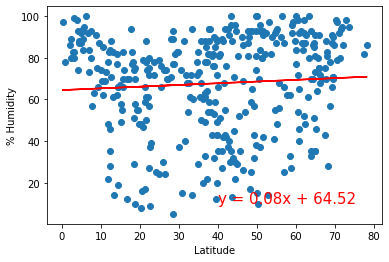

In [26]:
#Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
#Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

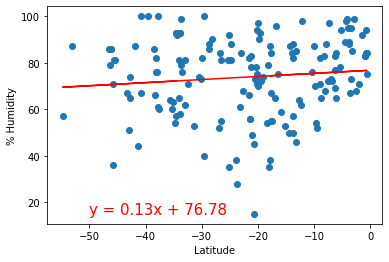

In [28]:
#Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
#Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

In [ ]:
#The correlation between the latitude and percent humidity is very low because the r-value is less than 0.04 for the Northern and Southern Hemispheres for the plots shown here. This means that percent humidity is unpredictable due to changing weather patterns that can increase or decrease percent humidity. Check the r-values for your plots. 

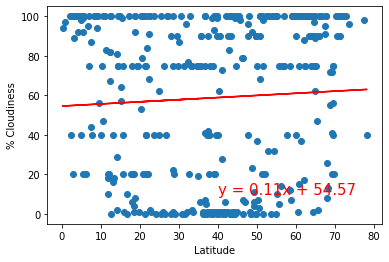

In [49]:
#Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
#Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40, 10))

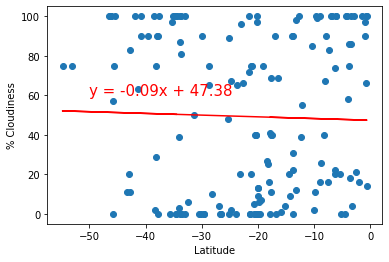

In [42]:
#Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
#Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

In [ ]:
#The correlation between the latitude and percent cloudiness is very low because the r-value is less than –0.09 for the Northern Hemisphere and less than –0.02 for the Southern Hemisphere for the plots shown here. This means that cloudiness is unpredictable due to changing weather patterns that can increase or decrease percent cloudiness. Check the r-values for your plots. 

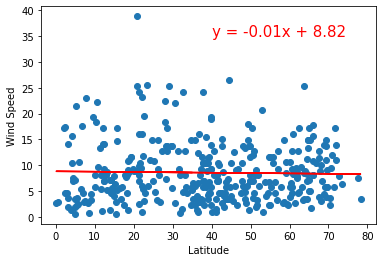

In [50]:
#Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
#Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

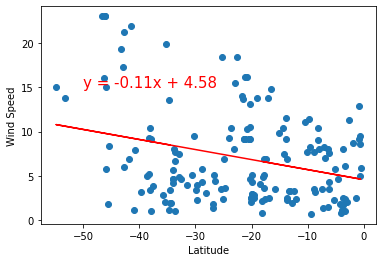

In [60]:
#Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
#Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,15))

In [ ]:
#The correlation between the latitude and wind speed is very low because the r-value is less  than –0.07 for the Northern Hemisphere and less than –0.3 for the Southern Hemisphere for the plots shown here. This means that wind speed is unpredictable due to changing weather patterns that can increase or decrease wind speed. Check the r-values for your plots. 